<a href="https://colab.research.google.com/github/devlai23/MusicClassifier/blob/main/CS_Project_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            filename  length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var  label
0    blues.00000.wav  661794          0.350088  ...     1.221291   46.936035      0
1    blues.00001.wav  661794          0.340914  ...     0.531217   45.786282      0
2    blues.00002.wav  661794          0.363637  ...    -2.231258   30.573025      0
3    blues.00003.wav  661794          0.404785  ...    -3.407448   31.949339      0
4    blues.00004.wav  661794          0.308526  ...   -11.703234   55.195160      0
..               ...     ...               ...  ...          ...         ...    ...
995   rock.00095.wav  661794          0.352063  ...    -1.193787   49.950665      9
996   rock.00096.wav  661794          0.398687  ...    -2.795338   31.773624      9
997   rock.00097.wav  661794          0.432142  ...    -2.106337   29.865515      9
998   rock.00098.wav  661794          0.362485  ...    -3.590644   41.299088      9
999   rock.00099.wav  661794          0.358401  ...     1.155239   49.662510

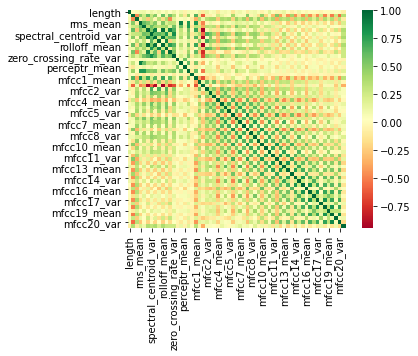

In [20]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

df = pd.read_csv('features_30_sec.csv')

labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Turn labels into numerical values
for i in range(len(labels)):
  df = df.replace(labels[i], i * 1)

y = df['label']
X = df.drop('label', axis = 1).drop('filename', axis=1).drop('length', axis=1)

# Scale the features
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

print(df)

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')



Random State: 1; Highest Score: 0.65; i: 5
Random State: 2; Highest Score: 0.79; i: 6
Random State: 3; Highest Score: 0.75; i: 0
Random State: 4; Highest Score: 0.63; i: 5
Random State: 5; Highest Score: 0.70; i: 6
Random State: 6; Highest Score: 0.74; i: 6
Random State: 7; Highest Score: 0.74; i: 0
Random State: 8; Highest Score: 0.77; i: 5
Random State: 9; Highest Score: 0.77; i: 8
Random State: 10; Highest Score: 0.70; i: 2
Random State: 11; Highest Score: 0.73; i: 5
Random State: 12; Highest Score: 0.67; i: 0
Random State: 13; Highest Score: 0.79; i: 4
Random State: 14; Highest Score: 0.75; i: 6
Random State: 15; Highest Score: 0.66; i: 1
Random State: 16; Highest Score: 0.74; i: 4
Random State: 17; Highest Score: 0.75; i: 10
Random State: 18; Highest Score: 0.74; i: 8
Random State: 19; Highest Score: 0.68; i: 0


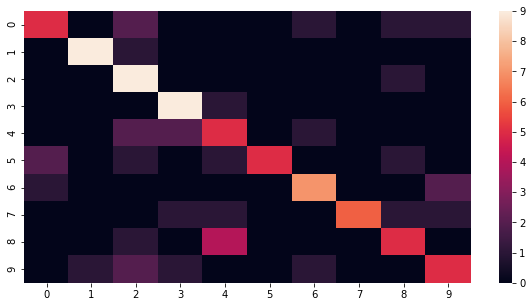

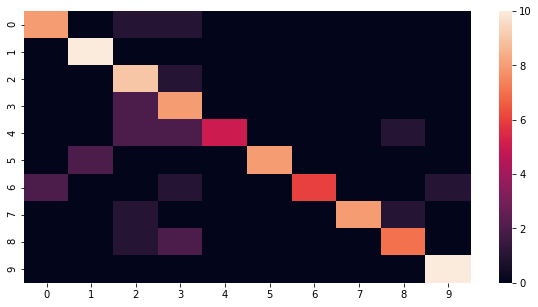

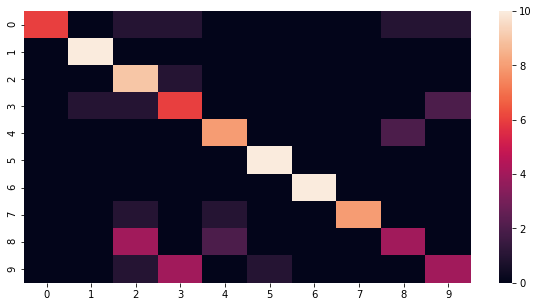

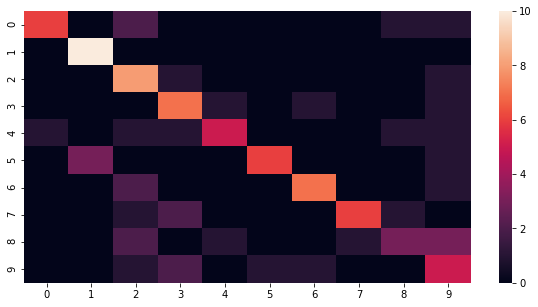

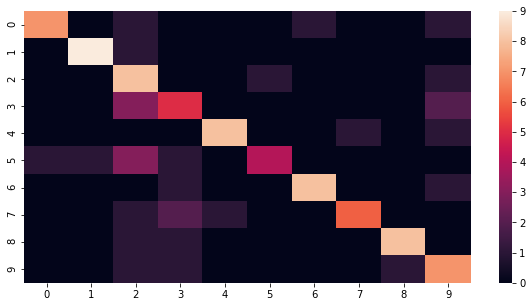

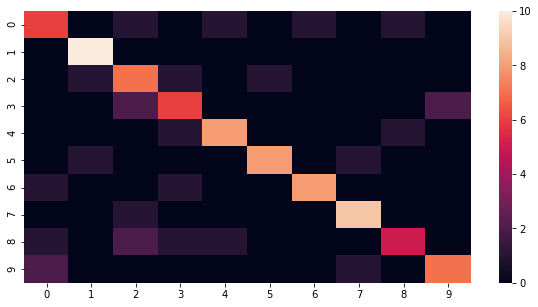

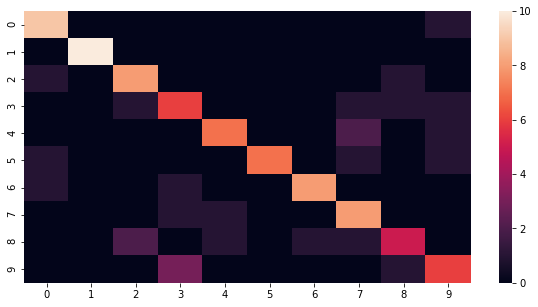

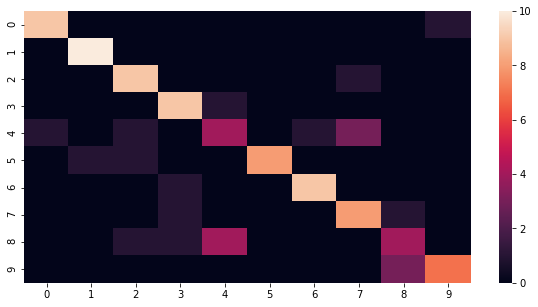

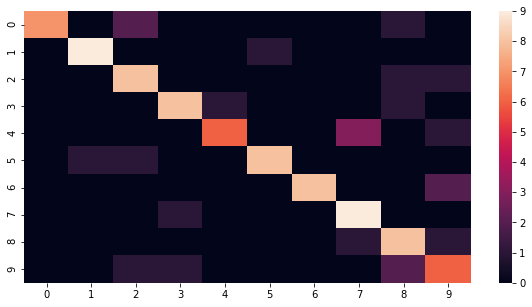

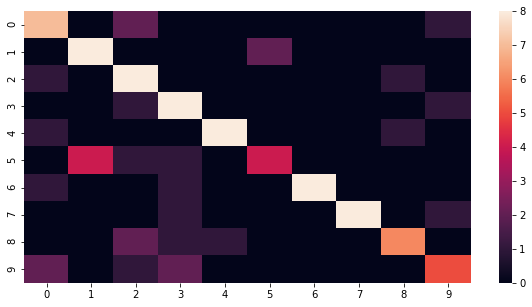

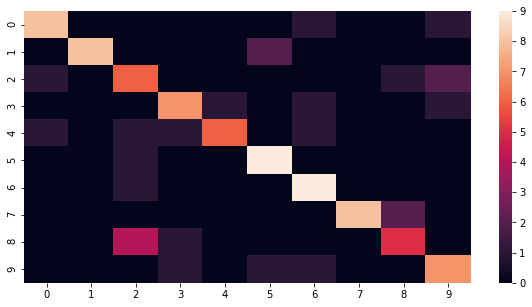

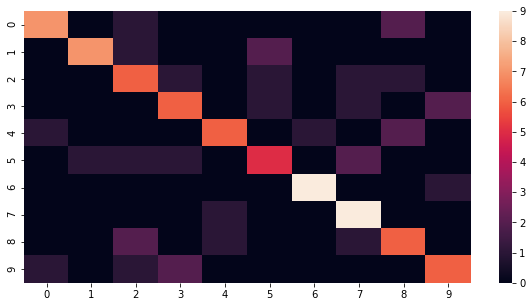

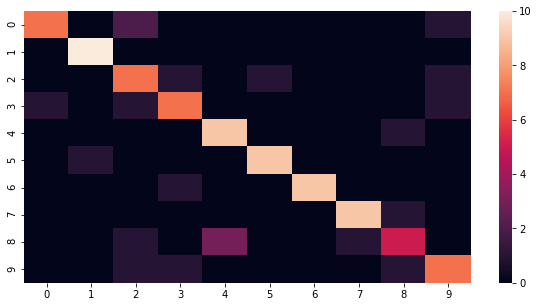

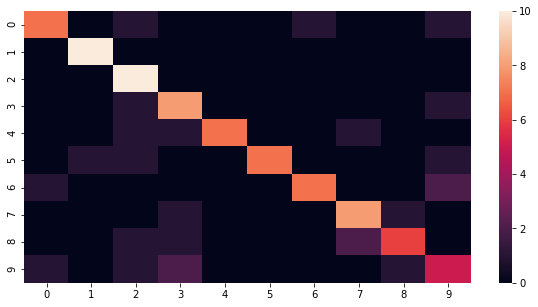

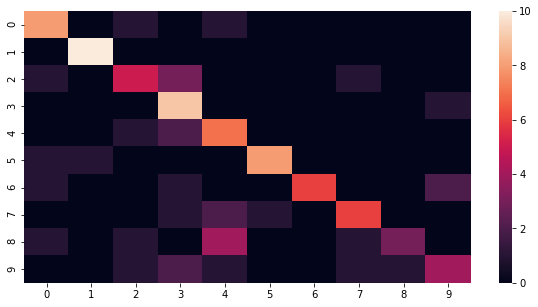

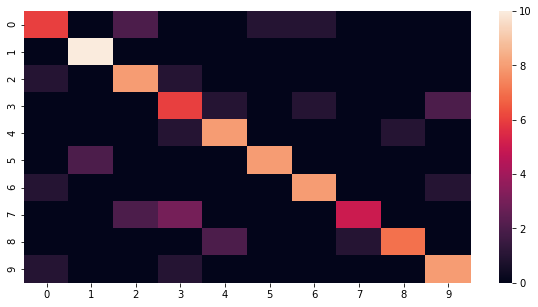

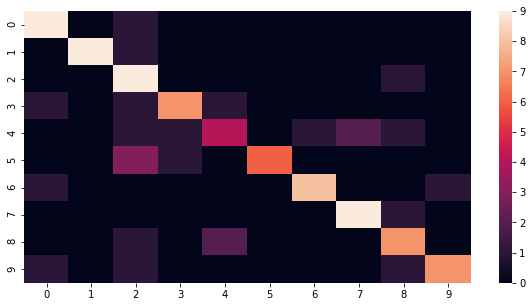

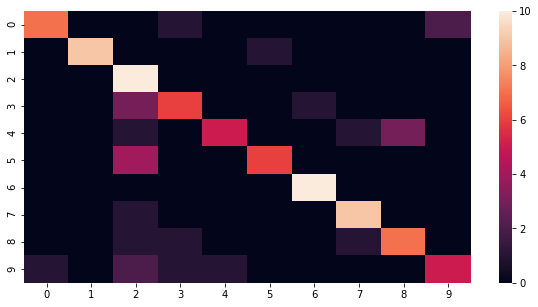

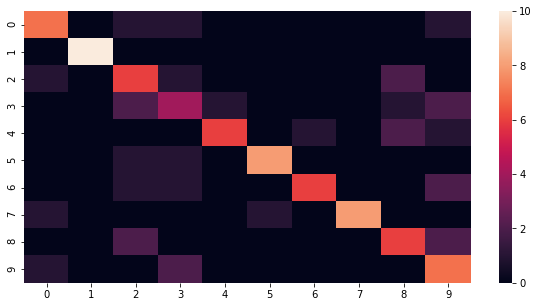

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

for random_state in range(1, 20):
  X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1 , random_state = random_state, stratify = y)

  neighbors = np.arange(1, 20)
  #train_accuracy = np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))
  highest_score = 0
  highest_i = 0
  confus_mat = 0

  for i, k in enumerate(neighbors):
      # Setup a k-NN Classifier with k neighbors: knn
      knn = KNeighborsClassifier(n_neighbors = k)

      # Fit the classifier to the training data
      knn.fit(X_train, y_train)

      #Compute accuracy on the training set
      #train_accuracy[i] = knn.score(X_train, y_train)

      #Compute accuracy on the testing set
      test_accuracy[i] = knn.score(X_test, y_test)
      if test_accuracy[i] > highest_score:
        highest_score = test_accuracy[i]
        highest_i = i
        preds = knn.predict(X_test)
        confus_mat = confusion_matrix(y_test, preds) 
  
  # knn = KNeighborsClassifier()

  # param_grid = {'n_neighbors': np.arange(1,50)}
  # knn_cv = GridSearchCV(knn, param_grid,cv=5)

  # knn_cv.fit(X_train, y_train)
  # print(random_state)
  # print(knn_cv.best_params_)
  # print(knn_cv.best_score_)
      
  plt.figure(figsize = (10, 5))
  sns.heatmap(confus_mat)

  print("Random State: %d; Highest Score: %.2f; i: %d" % (random_state, highest_score, highest_i))

  # Generate plot
  # plt.title('k-NN: Varying Neighbors, random_state=' + str(random_state))
  # plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
  # plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
  # plt.legend()
  # plt.xlabel('Neighbors')
  # plt.ylabel('Accuracy')
  # plt.show()